Set up


In [ ]:
!pip install kaggle
from google.colab import files
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
#From open source.
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle competitions download -c g-research-crypto-forecasting

competition.cpython-37m-x86_64-linux-gnu.so: Skipping, found more recently modified local copy (use --force to force download)
__init__.py: Skipping, found more recently modified local copy (use --force to force download)
example_sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
asset_details.csv: Skipping, found more recently modified local copy (use --force to force download)
supplemental_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
example_test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
training_data = pd.read_csv('train.csv.zip')  
supplemental_training_data = pd.read_csv('supplemental_train.csv.zip')  

In [ ]:
def Get_N_Asset(N):
  """Returns a cleaned array of an assets data"""
  data = training_data[training_data["Asset_ID"]==N].to_numpy()
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer.fit(data)
  ouput = imputer.transform(data)
  return ouput

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


Creating an array with two values per element for better prediction.

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


Linear regression

In [ ]:
# For i in range function is made, so that the regression algorithm analyses all stocks. Unfortunately, for i in range only works for 10 assets

for i in range(10):
  print("Asset number: ",i)
  N=i
  Asset = Get_N_Asset(N)



  X, y = Asset[:, :-1], Asset[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)



  Y_pred = regr.predict(X_test)




Asset number:  0
Asset number:  1
Asset number:  2
Asset number:  3
Asset number:  4
Asset number:  5
Asset number:  6
Asset number:  7
Asset number:  8
Asset number:  9


[0.]
[0.00304251 0.00123551 0.00278639 0.00280571 0.00343193 0.00273975
 0.0016191  0.00453826 0.00427448 0.0022613 ]


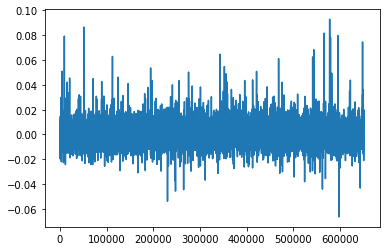